In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# 상재형이 연결한 SCFI 기준으로 모두 붙여 놓은 데이터 사용 
data_df =  pd.read_csv('full_data.csv')
print(data_df.shape)
data_df.head()

(623, 32)


,Date,target,SCFI-Europe (base port),SCFI-Med (base port),SCFI-WC America (base port),SCFI-EC America (base port),SCFI-Persian Gulf (Dubai),SCFI-ANZ (Melbourne),SCFI-W Africa (Lagos),SCFI-S Africa (Durban),...,PCI- China P.R.,용선료,연료유가,Total Containerships - % Idle/Laid Up/Scrubber Retrofit,Total Containerships - % Idle/Laid Up/Scrubber Retrofit.1,"신조선가-1,650/1,850 TEU","신조선가-13,000/14,000 TEU","신조선가-3,500/4,000 TEU","신조선가-13,000/13,500",이자율
0,2010-01-29,1333.93,1992.000000,1899.000000,1988.0,3081.000000,699.000000,1623.0,2511.0,1634.000000,...,NaN,5569.0,440.0,NaN,NaN,23.0,117.0,36.00,NaN,2.04
1,2010-02-05,1377.20,2068.000000,1947.000000,2061.0,3132.000000,701.000000,1612.0,2551.0,1661.000000,...,NaN,6330.0,447.5,NaN,NaN,23.0,117.0,36.00,NaN,2.04
2,2010-02-12,1396.21,2082.000000,1965.000000,2142.0,3157.000000,708.000000,1605.0,2599.0,1690.000000,...,NaN,6330.0,436.0,NaN,NaN,23.0,117.0,36.00,NaN,2.04
3,2010-02-19,1398.43,2109.333333,1988.333333,2142.0,3154.666667,709.666667,1585.0,2548.0,1684.333333,...,NaN,6330.0,443.5,NaN,NaN,23.0,117.0,36.00,NaN,2.04
4,2010-02-26,1400.65,2136.666667,2011.666667,2142.0,3152.333333,711.333333,1565.0,2497.0,1678.666667,...,NaN,6330.0,455.0,NaN,NaN,23.5,117.0,36.25,NaN,2.04


In [3]:
# 제 컴퓨터 문제인지는 모르겠지만 heatmap을 그리는데 seaborn / matplotlib 의 시각화 중에서 한글이 깨지는 문제가 발생했습니다.
# 인터넷에 있는 방법을 다 적용해봐도 문제가 있어서 상재 형께서 수정하신 변수명을 다시 영어로 수정하였습니다.

# 변수명 변경
data_df.rename(columns={'용선료':'Clarksons Average Containership Earnings'}, inplace = True)
data_df.rename(columns={'연료유가':'HSFO 380cst Bunker Prices (3.5% Sulphur), Rotterdam'}, inplace = True)
data_df.rename(columns={'신조선가-1,650/1,850 TEU' : 'Containership 1,650/1,850 TEU FCC, G\'less Newbuilding Prices'}, inplace = True)
data_df.rename(columns={'신조선가-13,000/14,000 TEU' : 'Containership 13,000/14,000 TEU Newbuilding Prices'}, inplace = True)
data_df.rename(columns={'신조선가-3,500/4,000 TEU' : 'Containership 3,500/4,000 TEU (Wide Beam) G\'less Newbuilding Prices'}, inplace = True)
data_df.rename(columns={'신조선가-13,000/13,500' : 'Containership 13,000/13,500 TEU G\'less Newbuilding Prices'}, inplace = True)
data_df.rename(columns={'이자율':'5 Year $10m Finance based on Libor 1st yr'}, inplace = True)

In [4]:
data_df.info()

# Date 컬럼이 Object 타입
# target 컬럼이 전체 SCFI 
# 나머지는 다 float 타입이라 수정할 필요가 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 32 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Date                                                                 623 non-null    object 
 1   target                                                               623 non-null    float64
 2   SCFI-Europe (base port)                                              623 non-null    float64
 3   SCFI-Med (base port)                                                 623 non-null    float64
 4   SCFI-WC America (base port)                                          623 non-null    float64
 5   SCFI-EC America (base port)                                          623 non-null    float64
 6   SCFI-Persian Gulf (Dubai)                                            623 non-null    float64
 7   SCFI-ANZ

In [5]:
# Date 컬럼을 Timestamp로 변환
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df.head()

,Date,target,SCFI-Europe (base port),SCFI-Med (base port),SCFI-WC America (base port),SCFI-EC America (base port),SCFI-Persian Gulf (Dubai),SCFI-ANZ (Melbourne),SCFI-W Africa (Lagos),SCFI-S Africa (Durban),...,PCI- China P.R.,Clarksons Average Containership Earnings,"HSFO 380cst Bunker Prices (3.5% Sulphur), Rotterdam",Total Containerships - % Idle/Laid Up/Scrubber Retrofit,Total Containerships - % Idle/Laid Up/Scrubber Retrofit.1,"Containership 1,650/1,850 TEU FCC, G'less Newbuilding Prices","Containership 13,000/14,000 TEU Newbuilding Prices","Containership 3,500/4,000 TEU (Wide Beam) G'less Newbuilding Prices","Containership 13,000/13,500 TEU G'less Newbuilding Prices",5 Year $10m Finance based on Libor 1st yr
0,2010-01-29,1333.93,1992.000000,1899.000000,1988.0,3081.000000,699.000000,1623.0,2511.0,1634.000000,...,NaN,5569.0,440.0,NaN,NaN,23.0,117.0,36.00,NaN,2.04
1,2010-02-05,1377.20,2068.000000,1947.000000,2061.0,3132.000000,701.000000,1612.0,2551.0,1661.000000,...,NaN,6330.0,447.5,NaN,NaN,23.0,117.0,36.00,NaN,2.04
2,2010-02-12,1396.21,2082.000000,1965.000000,2142.0,3157.000000,708.000000,1605.0,2599.0,1690.000000,...,NaN,6330.0,436.0,NaN,NaN,23.0,117.0,36.00,NaN,2.04
3,2010-02-19,1398.43,2109.333333,1988.333333,2142.0,3154.666667,709.666667,1585.0,2548.0,1684.333333,...,NaN,6330.0,443.5,NaN,NaN,23.0,117.0,36.00,NaN,2.04
4,2010-02-26,1400.65,2136.666667,2011.666667,2142.0,3152.333333,711.333333,1565.0,2497.0,1678.666667,...,NaN,6330.0,455.0,NaN,NaN,23.5,117.0,36.25,NaN,2.04


In [6]:
# Date 컬럼이 잘 변환됐는지 확인
data_df.info()
# 잘 변환되었음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 32 columns):
 #   Column                                                               Non-Null Count  Dtype         
---  ------                                                               --------------  -----         
 0   Date                                                                 623 non-null    datetime64[ns]
 1   target                                                               623 non-null    float64       
 2   SCFI-Europe (base port)                                              623 non-null    float64       
 3   SCFI-Med (base port)                                                 623 non-null    float64       
 4   SCFI-WC America (base port)                                          623 non-null    float64       
 5   SCFI-EC America (base port)                                          623 non-null    float64       
 6   SCFI-Persian Gulf (Dubai)                         

In [7]:
# 2018년 1월 1일 이후 csv파일 만들기
after_2018_data = data_df.query('"2018-01-01"<= Date')
after_2018_data.reset_index(drop=True, inplace=True)
print(after_2018_data.shape)
after_2018_data.head()
# 총 209개 

(209, 32)


,Date,target,SCFI-Europe (base port),SCFI-Med (base port),SCFI-WC America (base port),SCFI-EC America (base port),SCFI-Persian Gulf (Dubai),SCFI-ANZ (Melbourne),SCFI-W Africa (Lagos),SCFI-S Africa (Durban),...,PCI- China P.R.,Clarksons Average Containership Earnings,"HSFO 380cst Bunker Prices (3.5% Sulphur), Rotterdam",Total Containerships - % Idle/Laid Up/Scrubber Retrofit,Total Containerships - % Idle/Laid Up/Scrubber Retrofit.1,"Containership 1,650/1,850 TEU FCC, G'less Newbuilding Prices","Containership 13,000/14,000 TEU Newbuilding Prices","Containership 3,500/4,000 TEU (Wide Beam) G'less Newbuilding Prices","Containership 13,000/13,500 TEU G'less Newbuilding Prices",5 Year $10m Finance based on Libor 1st yr
0,2018-01-05,816.58,888.0,738.0,1465.0,2425.0,433.0,1218.0,1293.0,1178.0,...,1.66,10148.0,370.5,4.6,2.7,22.50,107.0,34.25,92.0,2.18
1,2018-01-12,839.72,897.0,759.0,1514.0,2608.0,450.0,1399.0,1481.0,1242.0,...,1.70,10148.0,370.0,4.3,2.6,22.75,107.0,34.50,92.5,2.18
2,2018-01-19,840.36,891.0,761.0,1436.0,2792.0,572.0,1360.0,1487.0,1264.0,...,1.75,10148.0,370.5,4.0,2.2,23.00,107.0,35.00,92.5,2.19
3,2018-01-26,858.60,907.0,772.0,1457.0,2761.0,631.0,1360.0,1525.0,1264.0,...,1.79,10148.0,372.0,3.8,2.0,23.25,107.0,35.25,92.5,2.19
4,2018-02-02,883.59,912.0,797.0,1552.0,2843.0,611.0,1351.0,1804.0,1292.0,...,1.72,11213.0,371.5,3.5,1.8,23.25,107.0,35.25,92.5,2.19


In [8]:
after_2018_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 32 columns):
 #   Column                                                               Non-Null Count  Dtype         
---  ------                                                               --------------  -----         
 0   Date                                                                 209 non-null    datetime64[ns]
 1   target                                                               209 non-null    float64       
 2   SCFI-Europe (base port)                                              209 non-null    float64       
 3   SCFI-Med (base port)                                                 209 non-null    float64       
 4   SCFI-WC America (base port)                                          209 non-null    float64       
 5   SCFI-EC America (base port)                                          209 non-null    float64       
 6   SCFI-Persian Gulf (Dubai)                         

In [9]:
# 2018년 1월 1일 이후 데이터에 결측치 확인하기
print(after_2018_data.shape)
after_2018_data.isnull().sum()
# 결측치 없음
# 데이터는 총 209개

(209, 32)


Date                                                                   0
target                                                                 0
SCFI-Europe (base port)                                                0
SCFI-Med (base port)                                                   0
SCFI-WC America (base port)                                            0
SCFI-EC America (base port)                                            0
SCFI-Persian Gulf (Dubai)                                              0
SCFI-ANZ (Melbourne)                                                   0
SCFI-W Africa (Lagos)                                                  0
SCFI-S Africa (Durban)                                                 0
SCFI-S America (Santos)                                                0
SCFI-W Japan (base port)                                               0
SCFI-E Japan (base port)                                               0
SCFI-SE Asia (Singapore)                           

In [10]:
# 2018년 이후 데이터에 빠진 주 찾기
from datetime import datetime, timedelta

for i in range(len(after_2018_data)-1):
    if (after_2018_data.loc[i+1,'Date']-after_2018_data.loc[i,'Date'])!=timedelta(days=7):
        diff = after_2018_data.loc[i+1,'Date']-after_2018_data.loc[i,'Date']
        missing_days = diff.days/7
        print(after_2018_data.loc[i,'Date'].strftime('%Y-%m-%d')+'뒤에'+str(missing_days)+'주 만큼 결측')
    
# 결측치 없음(확인해보니 상재형꼐서 다 채우셨음)

In [11]:
# 2018년 이후 데이터 csv 파일로 저장
after_2018_data.to_csv("data_after_2018.csv", index=False, encoding = 'utf-8-sig')

In [12]:
# 2020년 1월 1일 이후 csv파일 만들기
after_2020_data = data_df.query('"2020-01-01"<= Date')
after_2020_data.reset_index(drop=True, inplace=True)
print(after_2020_data.shape)
after_2020_data.head()

# 총 105개 

(105, 32)


,Date,target,SCFI-Europe (base port),SCFI-Med (base port),SCFI-WC America (base port),SCFI-EC America (base port),SCFI-Persian Gulf (Dubai),SCFI-ANZ (Melbourne),SCFI-W Africa (Lagos),SCFI-S Africa (Durban),...,PCI- China P.R.,Clarksons Average Containership Earnings,"HSFO 380cst Bunker Prices (3.5% Sulphur), Rotterdam",Total Containerships - % Idle/Laid Up/Scrubber Retrofit,Total Containerships - % Idle/Laid Up/Scrubber Retrofit.1,"Containership 1,650/1,850 TEU FCC, G'less Newbuilding Prices","Containership 13,000/14,000 TEU Newbuilding Prices","Containership 3,500/4,000 TEU (Wide Beam) G'less Newbuilding Prices","Containership 13,000/13,500 TEU G'less Newbuilding Prices",5 Year $10m Finance based on Libor 1st yr
0,2020-01-03,1022.720000,1124.000000,1185.000000,1636.000000,2808.0,1218.000000,949.000000,2744.0,1159.0,...,2.27,15285.0,289.25,6.8,6.1,26.0,109.0,41.5,98.0,2.19
1,2020-01-10,1002.580000,1058.000000,1179.000000,1543.000000,2888.0,1175.000000,937.000000,2873.0,1150.0,...,2.21,15268.0,297.25,7.0,6.2,26.0,109.0,41.5,98.0,2.19
2,2020-01-17,990.680000,1010.000000,1180.000000,1562.000000,2943.0,1123.000000,949.000000,2897.0,1084.0,...,2.27,15250.0,299.00,7.0,6.1,26.0,109.0,41.5,98.0,2.19
3,2020-01-24,981.190000,969.000000,1179.000000,1545.000000,2951.0,1126.000000,942.000000,2908.0,1087.0,...,2.36,15161.0,301.00,6.7,5.7,26.0,109.0,41.5,98.0,2.18
4,2020-01-31,957.653333,929.333333,1129.666667,1504.333333,2890.0,1113.666667,925.333333,2933.0,1080.0,...,2.11,15140.0,293.75,7.5,6.3,26.0,109.0,41.5,98.0,2.18


In [13]:
# 2020년 1월 1일 이후 csv 파일 저장
after_2020_data.to_csv("data_after_2020.csv", index = False, encoding = 'utf-8-sig')

<AxesSubplot:>

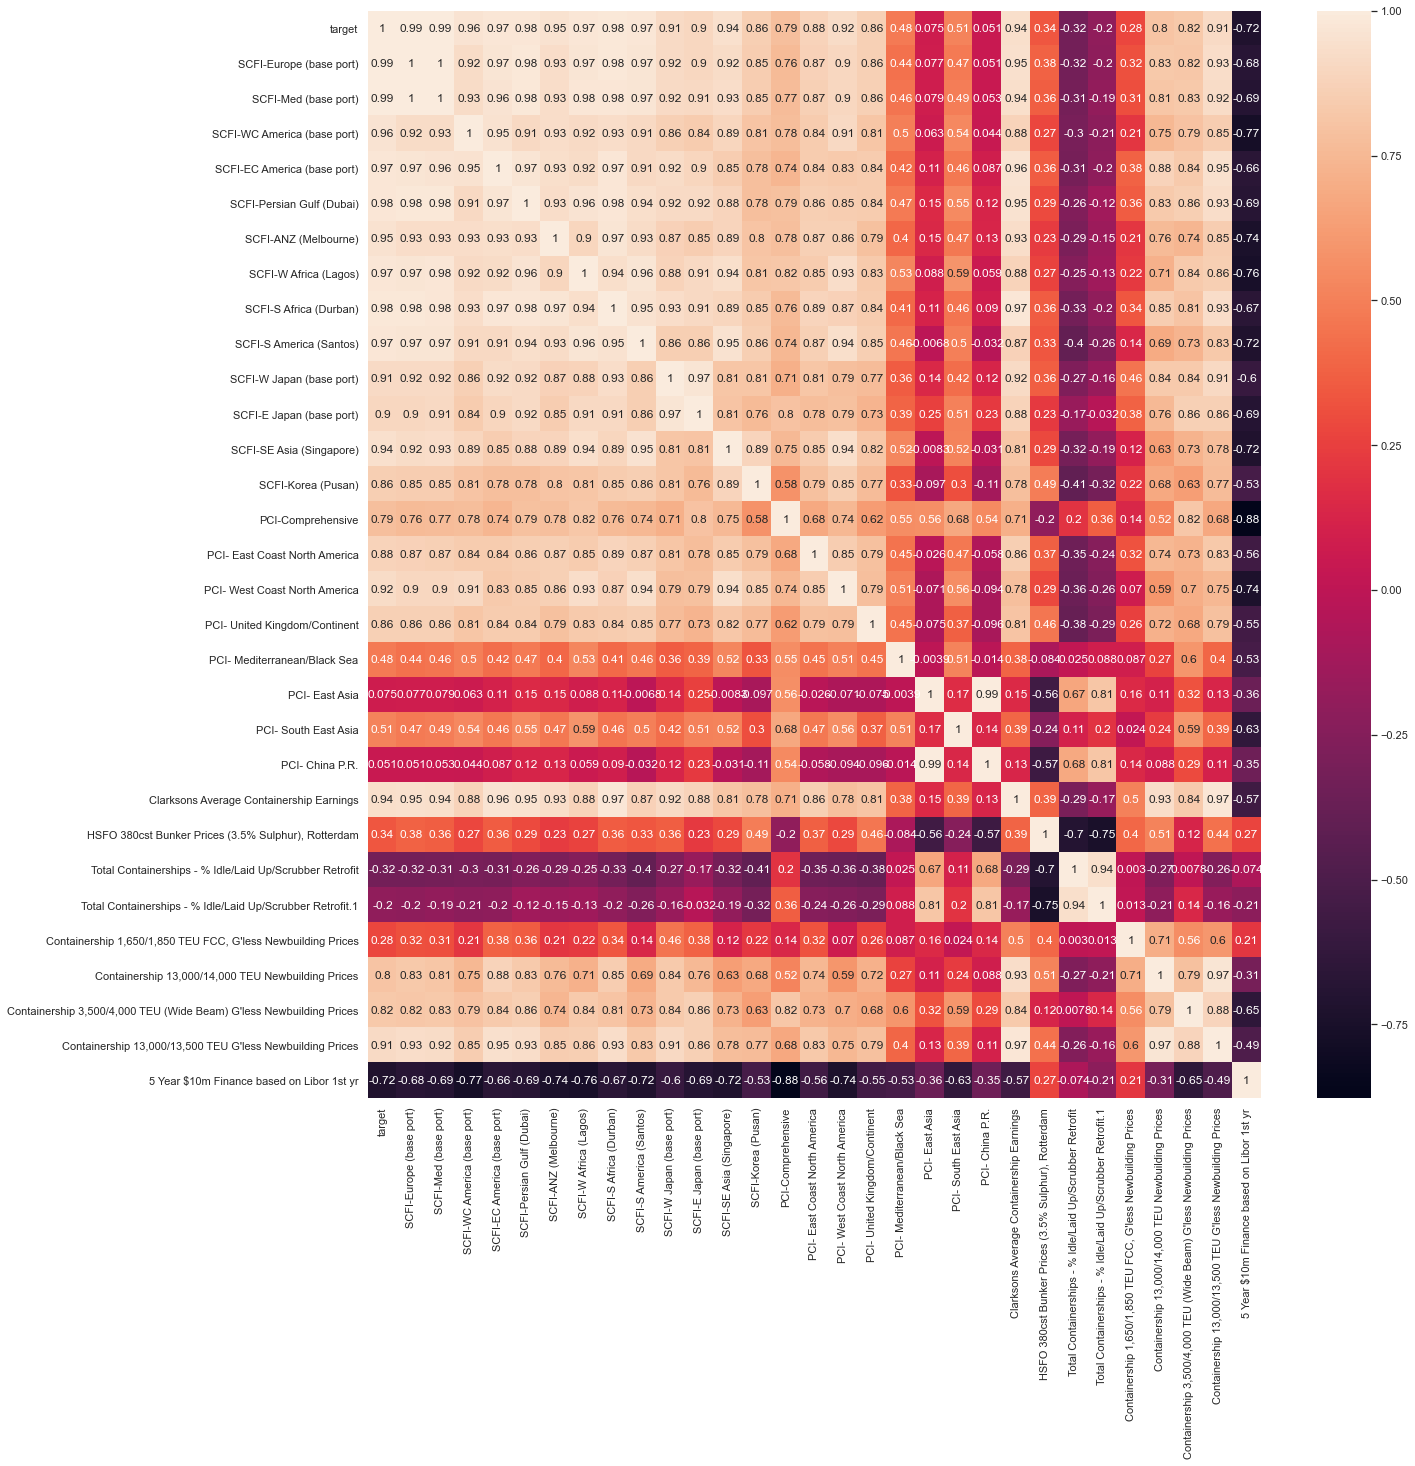

In [14]:
# 2018년 1월 1일 이후 데이터 상관관계

sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(after_2018_data.corr(), annot=True)

<AxesSubplot:>

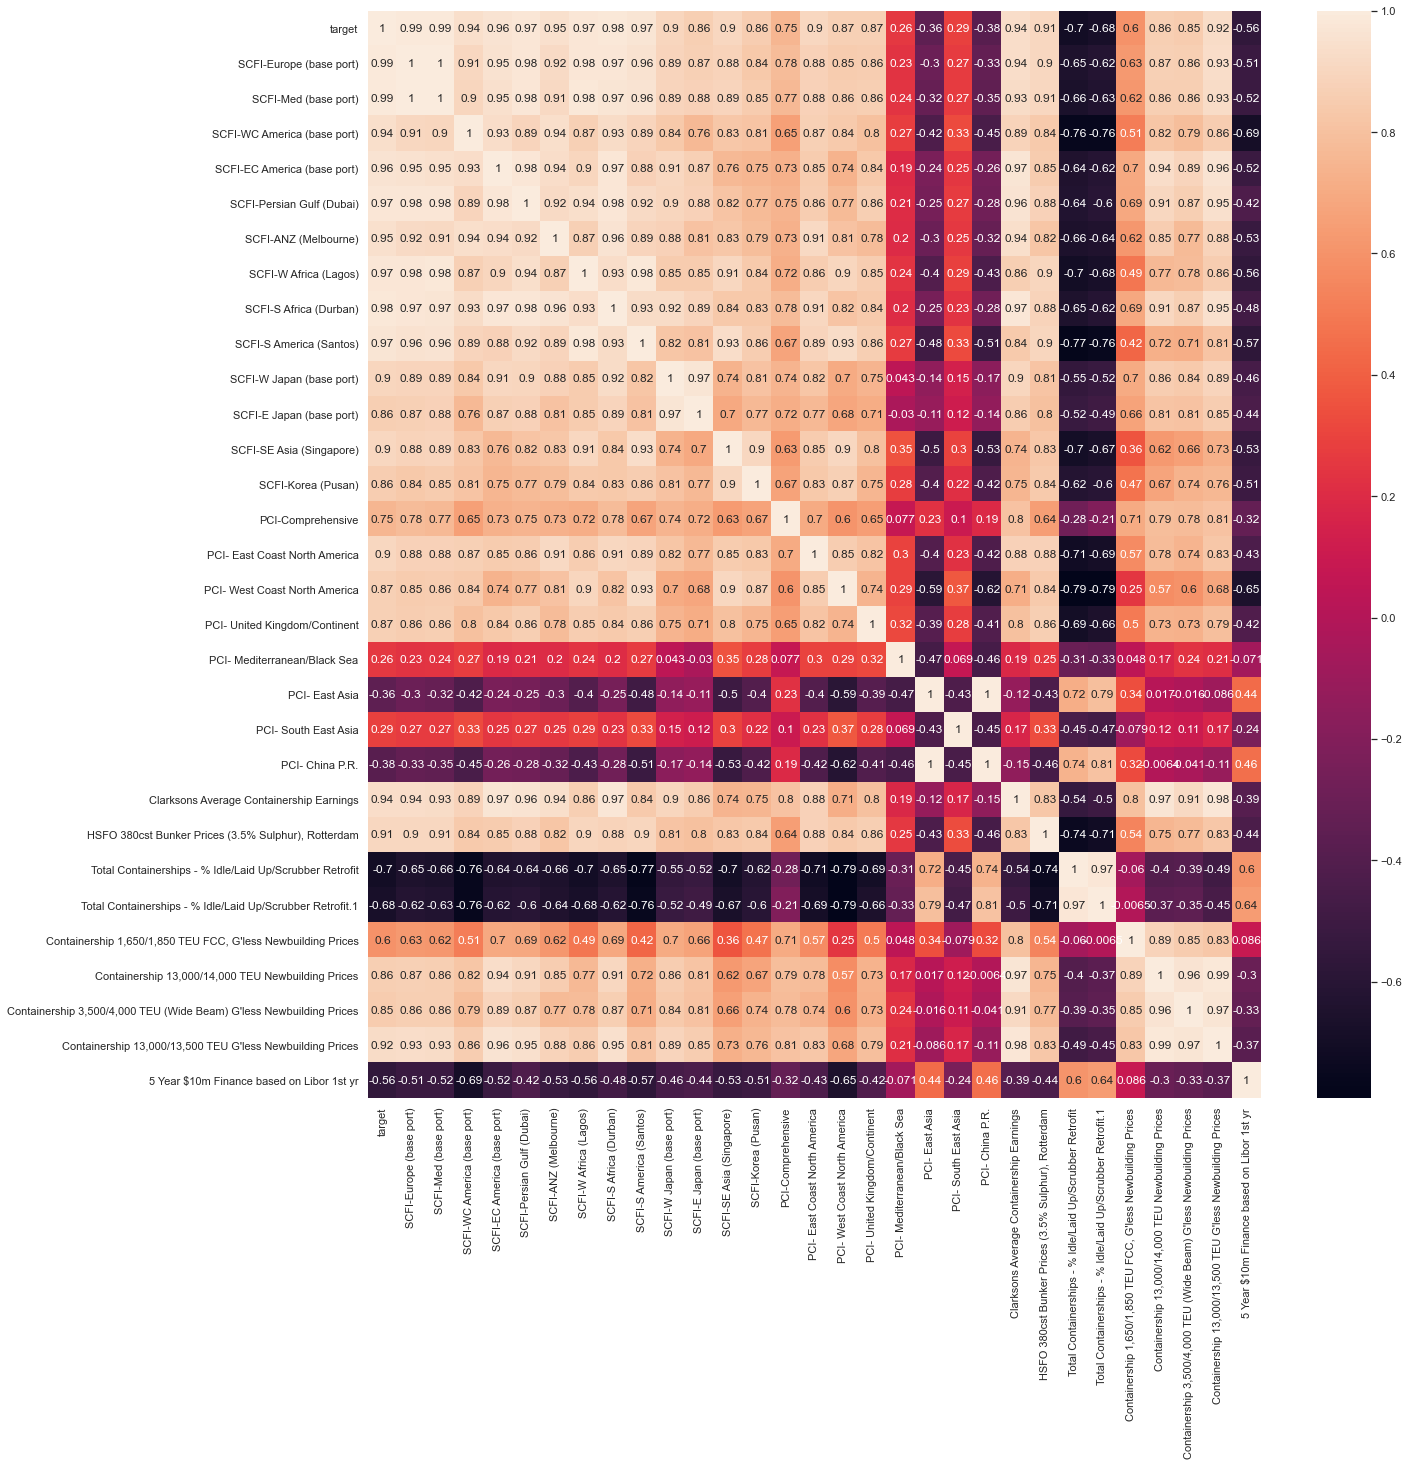

In [16]:
# 2020년 1월 1일 이후 데이터 상관 관계

sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(after_2020_data.corr(), annot=True)